# Homework 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root_scalar


### Plotting the solutions of $ m \ddot x + c \dot x +kx =0$
Here are the plots for varying $\eta$ parameter to distinguisch between underdampened, overdampened and critically dampened. All the solutions are calculated from the initial conditions $x(0)=1$, $\dot x (0)=0$

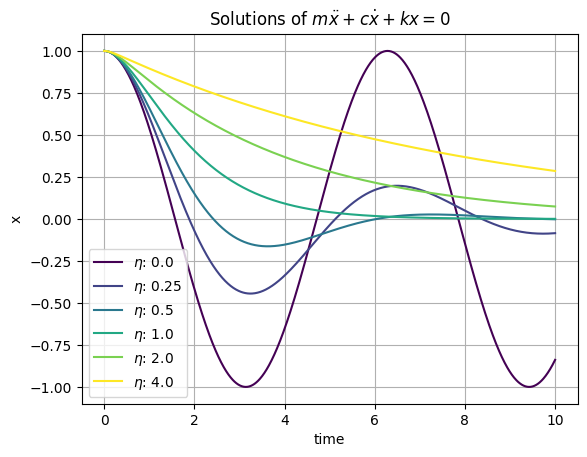

In [28]:


# Here I define the different solutions for each eta
def f(m,c,k):
  omega0 = (k/m)**0.5
  gamma = c/(2*m)
  eta = gamma/omega0
  if eta>1:
    omega = (gamma**2-omega0**2)**0.5
    A = (gamma+omega)/(2*omega)
    B = 1-A
    f = lambda t: A*np.exp((-gamma+omega)*t)+B*np.exp((-gamma-omega)*t)
  elif eta == 1:
    A = 1
    B = gamma*A
    f = lambda t: (A+B*t)*np.exp(-gamma*t)
  else:
    omega = (omega0**2-gamma**2)**0.5
    phi = np.arctan(-gamma/omega)
    A= 1/np.cos(phi)
    f = lambda t: A*np.exp(-gamma*t)*np.cos(omega*t+phi)
  return f

#Function to get eta in the plot
eta = lambda m,c,k: c/(2*(m*k)**0.5)

t = np.linspace(0,10,1000)
#Values of c to use in the plot
c = [0,0.5,1,2,4,8]

#The color for each line is taken from a color map to get a nicer effect
for c, color in zip(c, plt.cm.viridis(np.linspace(0,1, len(c)))):
  plt.plot(t, f(1,c,1)(t), color=color, label=f'$\eta$: {eta(1,c,1)}')
plt.grid()
plt.title(r'Solutions of $m \ddot x + c \dot x +kx =0$')
plt.xlabel('time')
plt.ylabel('x')
plt.legend(loc='best')


### Root-finding
The position at time $t$ is $s(t) = \frac{g}{2\omega}(\sinh (\omega t)-\sin (\omega t)) $ with $s(1)=1$. The function used in the algorithm is $\frac{\sinh (\omega)-\sin (\omega)}{\omega} - \frac{2}{g}$

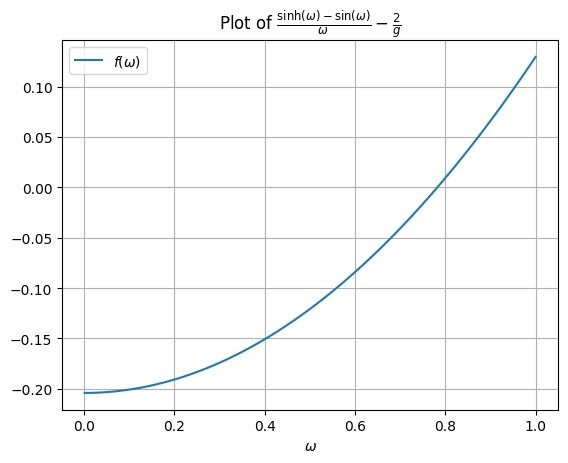

In [29]:
g = 9.8

f = lambda x: (np.sinh(x)-np.sin(x))/x-2/g


x = np.linspace(1e-3,1,100) # f is not defined in zero
plt.title(r'Plot of $\frac{\sinh (\omega)-\sin (\omega)}{\omega}- \frac{2}{g}$')
plt.plot(x,f(x), label = f'$f(\omega)$')
plt.grid()
plt.xlabel(f'$\omega$')
plt.legend()


From looking at the plot, is seems that a good choiche for the starting points is 0.7, 0.8. 

I have implemented the bisection and the Newton-Raphson methods by hand, and tested them against the scipy methods

In [56]:
# Bisection method

eps = 1e-9

a = 0.7
b = 0.8

#bisection method
def bisection(f,a,b,eps):
  m = 0
  e = 1
  while e>eps:      
    m = (a+b)/2.0
    e = (b-a)/(2*m) #The change in m is equal to half the interval
    f_a = f(a)
    f_m = f(m)

    if f_a*f_m>0: #If f(a) an f(m) have the same sign, make m the left extreme
      a = m 
    else: #Otherwise, it's the right extreme that should be chaged
      b = m
  return m

#Newton-Raphson method
def Newton(f,df,x0,eps):
  e = 1
  x = x0
  while e>eps:
    x0 = x
    x = x0-f(x0)/df(x0)
    e = abs(x-x0)/x0
  return x

df = lambda x: (np.cosh(x)-np.cos(x))/x-(np.sinh(x)-np.sin(x))/x**2  #Derivate of f

%timeit bisection(f,a,b,eps)  #Time the algorithm to get an idea of the efficiency
print(f'The root obtained by the bisection method is {bisection(f,a,b,eps)}')
%timeit Newton(f,df,b,eps)
print(f'The root obtained by the Newton-Raphson method is {Newton(f,df,b,eps)}')
%timeit root_scalar(f, bracket = [a,b], rtol=eps, method = 'brentq')
root  = root_scalar(f, bracket=[a,b], rtol=eps, method='brentq').root
print(f'Root obtained by the scipy methods: {root}')


90.4 µs ± 1.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
The root obtained by the bisection method is 0.7822864182293414
21 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
The root obtained by the Newton-Raphson method is 0.7822864183907654
16.5 µs ± 929 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Root obtained by the scipy methods: 0.7822864185440067
